# Credit Card Fraud Detection

* Avrupalı ​​kart sahipleri tarafından Eylül 2013'te kredi kartlarıyla yapılan işlemleri içermekte.
* 284.807 işlemden 492 dolandırıcılığın olduğu iki günde gerçekleşen işlemleri sunmakta.
* İşlem ve tutar dışında diğer sütunların ne olduğunu bilinmiyor (gizlilik nedeniyle). 
* Bilinmeyen sütunlar ölçeklendirilmiş.
* İşlem tutarları küçük -> ort 88 dolar
* Null değer yok.
* Veri çok dengesiz %99.83 normal, %0.17 dolandırıcılık işlemi
* PCA Dönüşümü: Verilerin açıklaması, tüm özelliklerin bir PCA dönüşümünden (Boyut Azaltma tekniği) geçtiğini söylüyor (zaman ve miktar hariç).
* Ölçeklendirme: Bir PCA dönüşümü uygulamak için özelliklerin önceden ölçeklendirilmesi gerekli. (Bu durumda, tüm V özellikleri ölçeklenmiştir veya en azından veri setini geliştiren kişilerin bunu yaptığını varsayıyoruz.)
* Özellikler V1, V2, … V28, PCA ile elde edilen başlıca bileşenlerdir, PCA ile dönüştürülmemiş yegane özellikler 'Zaman' ve 'Miktar'dır. 'Zaman' özelliği, her işlem ile veri kümesindeki ilk işlem arasında geçen saniyeleri içerir. 'Tutar' özelliği, işlem Tutarı'dır, bu özellik, örneğe bağlı, maliyete duyarlı öğrenme için kullanılabilir. Özellik 'Sınıf' yanıt değişkenidir ve dolandırıcılık durumunda 1, aksi takdirde 0 değerini alır.
* The Machine Learning Group of ULB (Université Libre de Bruxelles) and Worldline cooperated to collect the dataset for big data mining and fraud detection. 
    * Kaynak: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
        * Çalışmalar: 
            * https://paperswithcode.com/dataset/kaggle-credit-card-fraud-dataset
            * https://www.researchgate.net/profile/Mohammed-Al-Shabi/publication/335526336_Credit_Card_Fraud_Detection_Using_Autoencoder_Model_in_Unbalanced_Datasets/links/5f2a7901a6fdcccc43ac10d4/Credit-Card-Fraud-Detection-Using-Autoencoder-Model-in-Unbalanced-Datasets.pdf
            * https://github.com/tusharsarkar3/XBNet
            * https://arxiv.org/pdf/2106.05239v3.pdf
            * https://arxiv.org/pdf/1911.08623v1.pdf
            * https://github.com/GuansongPang/deviation-network
            * https://github.com/xuhongzuo/DeepOD
            * https://github.com/Ryosaeba8/Anomaly_detection
            * https://github.com/robeespi/Deep-Semi-supervised-intrusion-detection-on-unstructured-Hadoop-distributed-file-system-logs
            * https://github.com/robeespi/Weakly-Supervised-Malware-Detection
            * https://arxiv.org/pdf/2206.06602v2.pdf
            * https://github.com/xuhongzuo/deep-iforest
            * https://arxiv.org/pdf/2211.06675v1.pdf (+ IEEE CIS Data set)
            * https://github.com/davidnugent2425/he-cc-fraud-detection


## Kütüphanelerin Import Edilmesi

In [1]:
#!pip3 install catboost

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

from sklearn import metrics
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import Precision, Recall, AUC
from keras.models import Sequential
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Activation, Input, Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping


import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

import sys
sys.path.append(parent_dir)

import BalanceDataset as balance
import MachineLearningModels as ml_models
import DeepLearningModels as dl_models

import shap

# Veri Setinin Import Edilmesi

In [3]:
data = pd.read_csv('creditcard.csv')
df = data.copy()

# Veri Seti Yapısının İncelenmesi

In [4]:
#Vx şeklindeki özellikler PCA ile dönüştürülmüş, zaman ve miktar dönüştürülmemiş
df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info() #null değerimiz yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
def show_graphs(df):
    fraud_counts = df['Class'].value_counts()

    # pie chart
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

    ax1.pie(fraud_counts, labels=['Non-fraudulent', 'Fraudulent'], colors=['lightblue', 'red'], autopct='%1.1f%%')
    ax1.set_title('Transaction Class Distribution')

    # bar plot
    ax2.bar(['Non-fraudulent', 'Fraudulent'], fraud_counts.values, color=['lightblue', 'red'])
    ax2.set_xlabel('Transaction Class')
    ax2.set_ylabel('Number of Transactions')
    ax2.set_title('Credit Card Fraud Detection')
    for i in ax2.containers:
        ax2.bar_label(i,)

    plt.show()

# Veri setimiz oldukça dengesiz

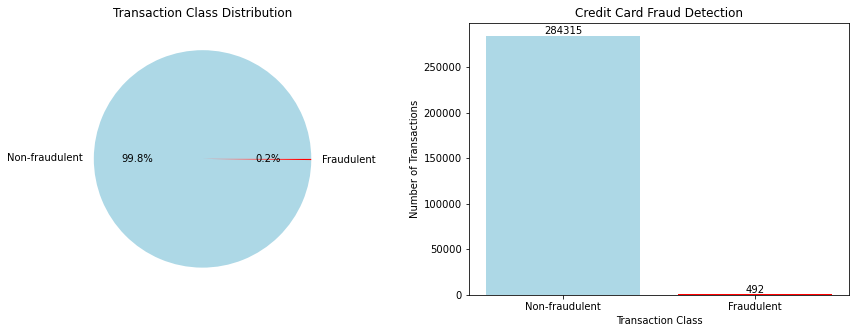

In [8]:
show_graphs(df)

In [9]:
non_fradulent_count = df['Class'].value_counts()[0]
fradulent_count = df['Class'].value_counts()[1]

print(f"Normal işlem sayısı = {non_fradulent_count} (% {non_fradulent_count/len(df)*100})")
print(f"Dolandırıcılık işlemi sayısı = {fradulent_count} (% {fradulent_count/len(df)*100})")

Normal işlem sayısı = 284315 (% 99.82725143693798)
Dolandırıcılık işlemi sayısı = 492 (% 0.1727485630620034)


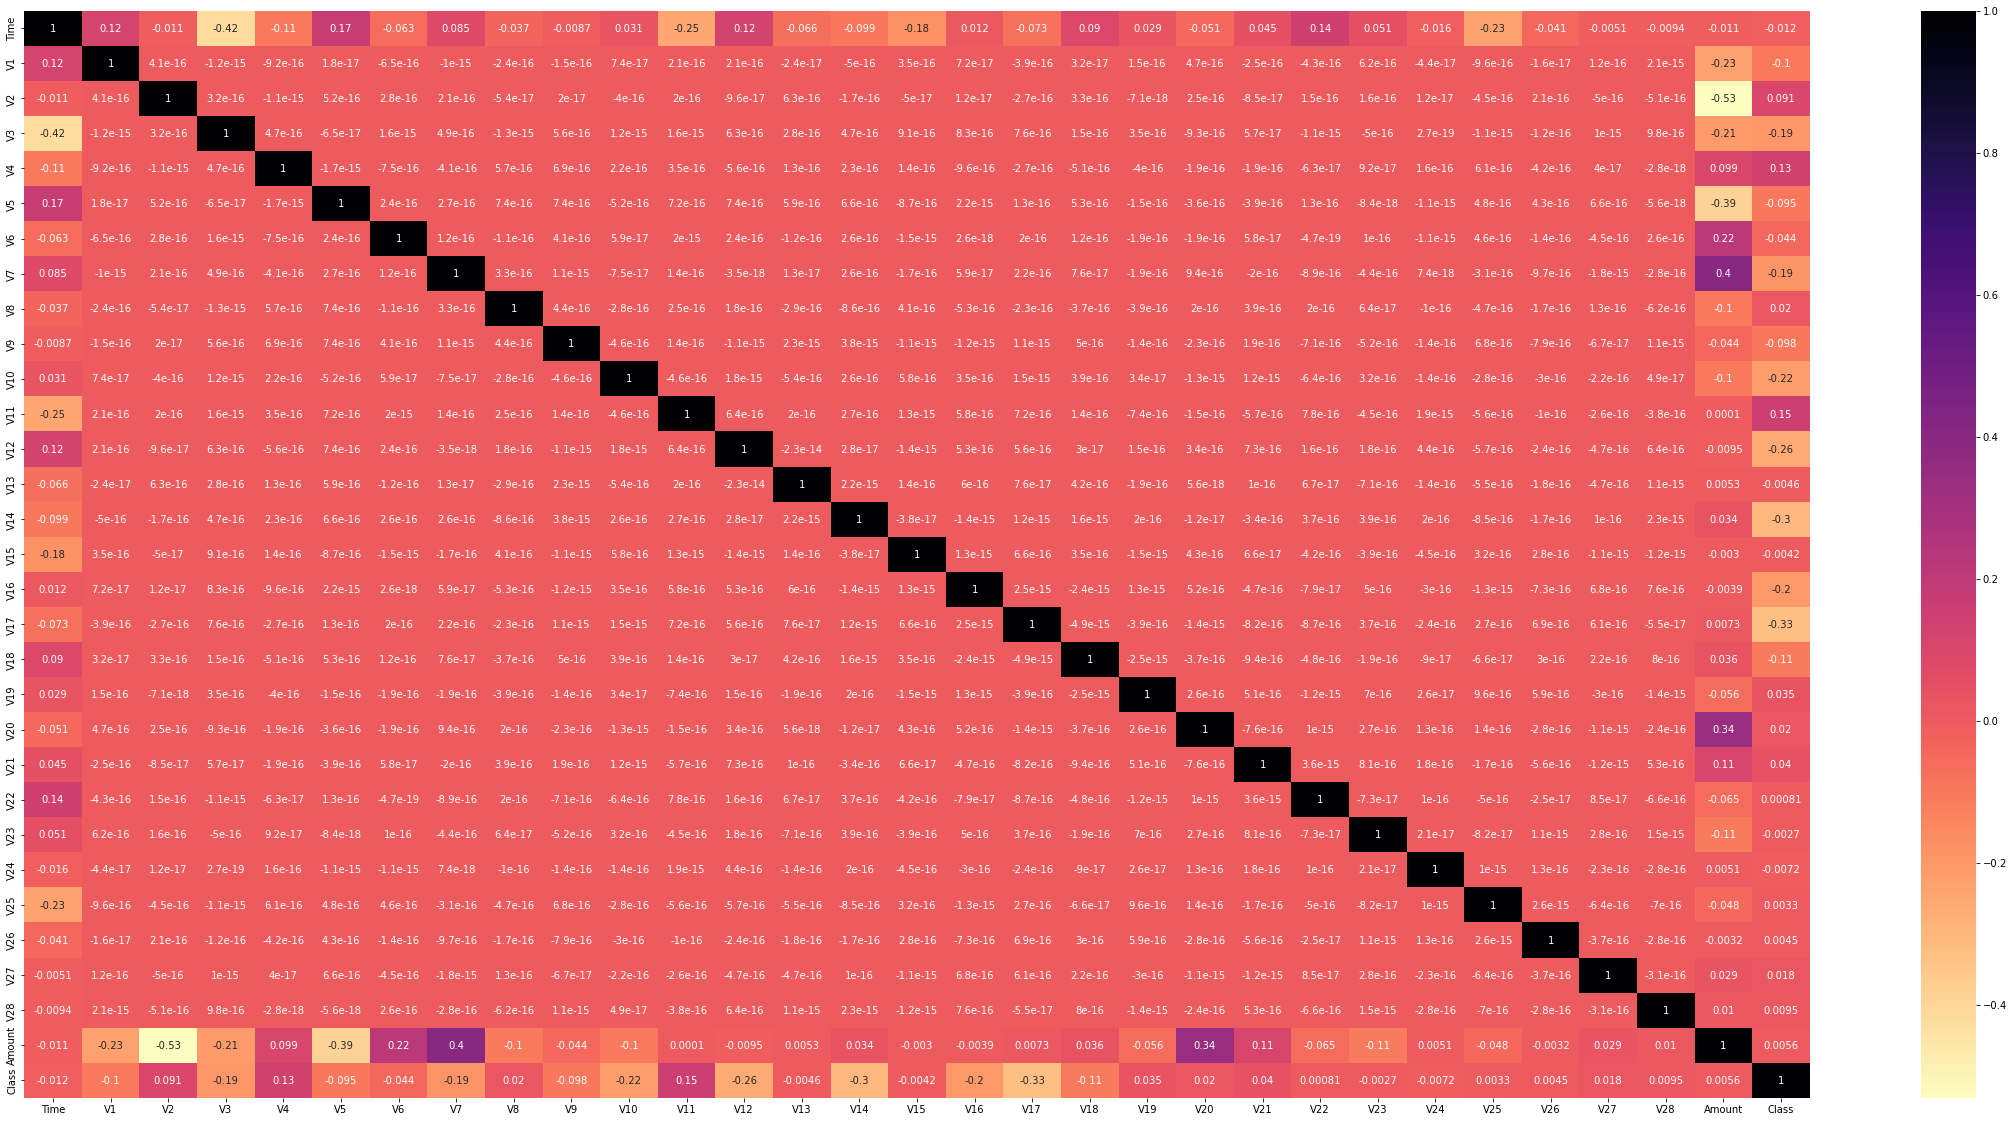

In [10]:
plt.figure(figsize = (40,20))
sns.heatmap(df.corr(), cmap="magma_r", annot=True);

# Veri Ön İşleme

* "Time" ve "amount" sütunları dışında tüm özelliklerin PCA dönüşümünden geçirildiği bilinmekte. 
Bu bilgiye dayanarak belirtilen sütunlar dışında kalan özelliklerin ölçeklendirildiği söylenebilir. 
    * Çünkü özelliklerin PCA dönüşümü geçirebilmesi için ölçeklenmesi gerekir.


In [11]:
df.drop_duplicates(inplace=True) #tekrar eden verileri temizledik

### Aykırı Değer İşlemleri

In [12]:
numeric_columns = (list(df.loc[:, 'V1':'Amount']))

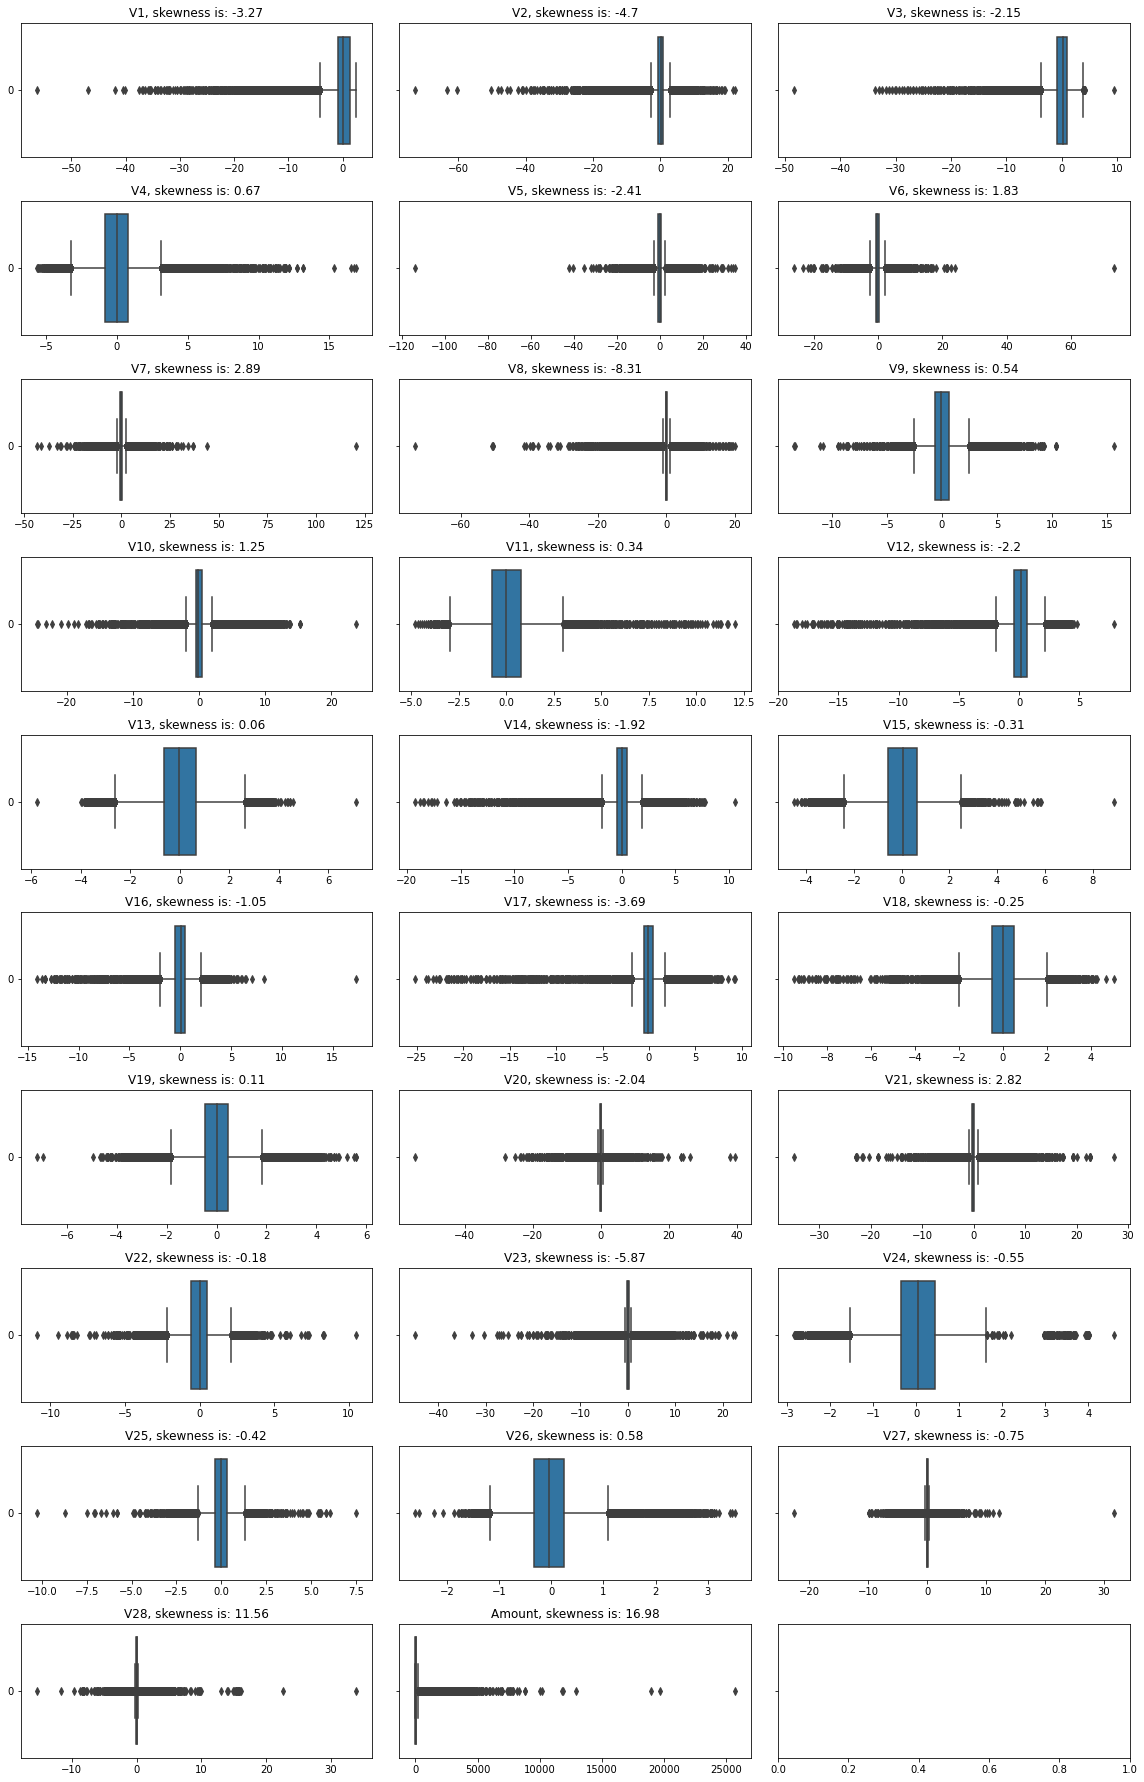

In [13]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=10, cols=3, suptitle='')
plt.tight_layout()

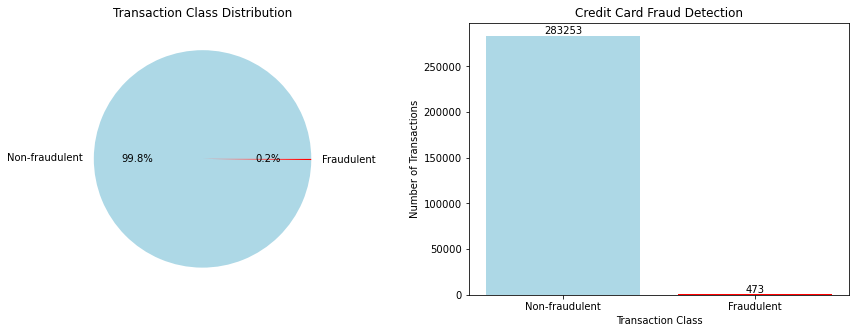

In [14]:
show_graphs(df)

In [15]:
non_fradulent_count = df['Class'].value_counts()[0]
fradulent_count = df['Class'].value_counts()[1]

print(f"Normal işlem sayısı = {non_fradulent_count} (% {non_fradulent_count/len(df)*100})")
print(f"Dolandırıcılık işlemi sayısı = {fradulent_count} (% {fradulent_count/len(df)*100})")

Normal işlem sayısı = 283253 (% 99.83328986416473)
Dolandırıcılık işlemi sayısı = 473 (% 0.1667101358352777)


In [16]:
df["Class"].unique()

array([0, 1], dtype=int64)

## Feature Selection

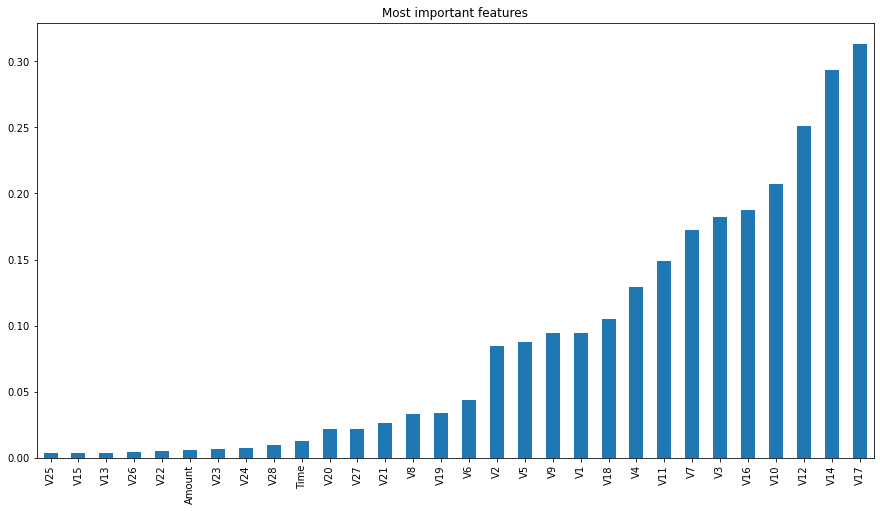

In [17]:
plt.figure(figsize=(15,8))
d = df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Most important features')

plt.show()

In [18]:
selected_features = df.corr()['Class'][:-1].abs() > 0.15

print (selected_features)

Time      False
V1        False
V2        False
V3         True
V4        False
V5        False
V6        False
V7         True
V8        False
V9        False
V10        True
V11       False
V12        True
V13       False
V14        True
V15       False
V16        True
V17        True
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Name: Class, dtype: bool


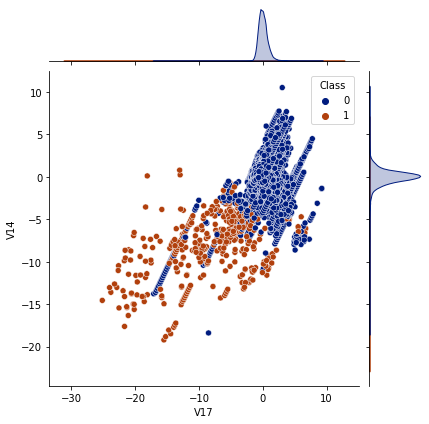

In [19]:
sns.jointplot(x='V17', y='V14',hue='Class', data=df, palette = 'dark')

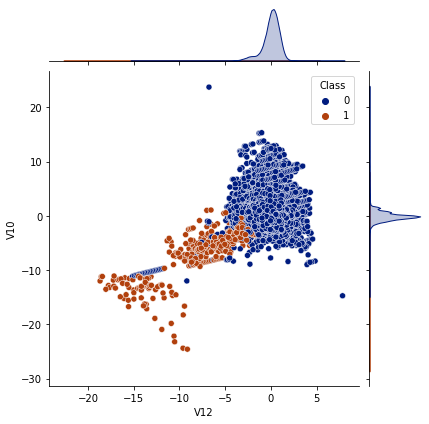

In [20]:
sns.jointplot(x='V12', y='V10', hue='Class', data=df, palette = 'dark')

# Veri Setinin Bölünmesi

### Stratified Splitting


* Bu veri kümesi bölümleri genellikle bir hedef değişkene göre rastgele oluşturulur. 
Ancak bunu yaparken, özellikle küçük veri kümeleri söz konusu olduğunda, 
hedef değişkenin farklı bölümler arasındaki oranları farklılık gösterebilir.

* Bu teknik ile, bölünmüş olan training ve test parçalarında eşit oranda sınıf yüzdesi sağlanmış olur.


In [21]:
amount = df['Amount'].values.reshape(-1, 1)

scaler = StandardScaler()
amount_scaled = scaler.fit_transform(amount)

df['Amount'] = amount_scaled

In [22]:
X = df.drop('Class', axis=1)
y = df['Class']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 85)

In [24]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


# Model Oluşturma

## Oversample/Undersample Tekniklerinin Uygulanması

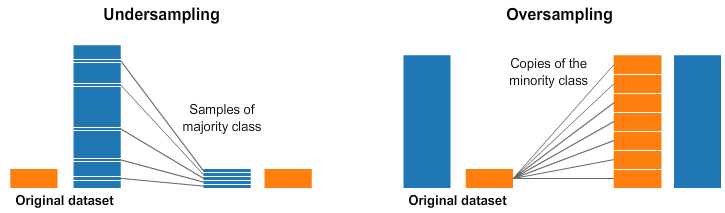

* Bu noktada göz önünde bulundurulması gereken en önemli etken veri setinin kullanılacak olan teknikten önce bölünmüş olmasıdır. Bunun asıl amacı test setinin veri yapısını bozmamaktır.

* Veri setini bölmeden oversampling tekniğinin uygulanması, aynı gözlemlerin hem test hem de training setlerinde 
bulunmasına sebebiyet verebilir. Bu, modelin yalnızca belirli veri noktalarını ezberlemesine neden olabilir, 
overfitting ve test verilerinde zayıf genellemeye neden olabilir. Veri sızıntısı, tamamen geçersiz olmasa da 
aşırı iyimser tahmin modelleri oluşturulmasına sebep olabilir.
    * Veri sızıntısı eğitim veri kümesinin dışından olan bilgiler ile model üretmek için kullanıldığı zaman ortaya çıkar.


### Random Oversampling

In [25]:
# Örnekleme ile veri arttırması kaynaklı olarak Overfittinge sebep olabilir.

In [26]:
X_train_ros, y_train_ros = balance.balancedWithRandomOverSampler(X_train,y_train)

Non-Frauds: 198277 / 50.0 % of the dataset
Frauds: 198277 / 50.0 % of the dataset


### Random Undersampling

In [27]:
# Verilerin kasıtlı azaltılması sonucu Underfittinge sebep olabilir. 

In [28]:
X_train_rus, y_train_rus = balance.balancedWithRandomUnderSampler(X_train,y_train)

Non-Frauds: 331 / 50.0 % of the dataset
Frauds: 331 / 50.0 % of the dataset


### SMOTE

* SMOTE (Synthetic Minority Oversampling Technique), azınlık sınıfı için öğeleri sentezler. SMOTE, özellik uzayında yakın olan örnekleri seçerek, özellik uzayındaki örnekler arasında bir çizgi çizerek ve bu çizgi boyunca bir noktada yeni bir örnek çizerek çalışır.

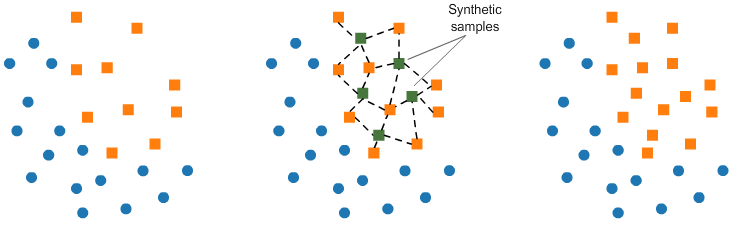

In [29]:
X_train_smote, y_train_smote = balance.balanceWithSMOTE(X_train, y_train)

Non-Frauds: 198277 / 50.0 % of the dataset
Frauds: 198277 / 50.0 % of the dataset


### ADASYN

In [30]:
X_train_adasyn, y_train_adasyn = balance.balanceWithADASYN(X_train, y_train)

Non-Frauds: 198277 / 50.0 % of the dataset
Frauds: 198292 / 50.0 % of the dataset


# Model Oluşturma ve Eğitme

In [31]:
ml_models_list = [
    
                  lgb.LGBMClassifier(), 
                  AdaBoostClassifier(),
                  GradientBoostingClassifier(),
                  CatBoostClassifier(),
                  XGBClassifier(),
                  LogisticRegression(),
                  RandomForestClassifier(),
                  KNeighborsClassifier(),
                  GaussianNB(),
                  DecisionTreeClassifier(),                  
]             

## İşlemden Geçirilmemiş Modellerin Karşılaştırılması

In [32]:
for i in ml_models_list:
    ml_models.model_performance(i, X_train, X_test, y_train, y_test, "baseline")

***** LGBMClassifier_baseline DONE *****
***** AdaBoostClassifier_baseline DONE *****
***** GradientBoostingClassifier_baseline DONE *****
Learning rate set to 0.098669
0:	learn: 0.3670587	total: 183ms	remaining: 3m 2s
1:	learn: 0.2009753	total: 205ms	remaining: 1m 42s
2:	learn: 0.1071635	total: 228ms	remaining: 1m 15s
3:	learn: 0.0589462	total: 249ms	remaining: 1m 1s
4:	learn: 0.0346868	total: 271ms	remaining: 54s
5:	learn: 0.0218326	total: 292ms	remaining: 48.4s
6:	learn: 0.0147484	total: 312ms	remaining: 44.2s
7:	learn: 0.0105116	total: 331ms	remaining: 41s
8:	learn: 0.0081243	total: 350ms	remaining: 38.5s
9:	learn: 0.0065608	total: 367ms	remaining: 36.3s
10:	learn: 0.0054425	total: 386ms	remaining: 34.7s
11:	learn: 0.0046577	total: 405ms	remaining: 33.4s
12:	learn: 0.0040611	total: 424ms	remaining: 32.2s
13:	learn: 0.0037346	total: 443ms	remaining: 31.2s
14:	learn: 0.0034500	total: 460ms	remaining: 30.2s
15:	learn: 0.0032320	total: 478ms	remaining: 29.4s
16:	learn: 0.0030591	total:

162:	learn: 0.0011988	total: 3.29s	remaining: 16.9s
163:	learn: 0.0011961	total: 3.3s	remaining: 16.8s
164:	learn: 0.0011888	total: 3.32s	remaining: 16.8s
165:	learn: 0.0011852	total: 3.34s	remaining: 16.8s
166:	learn: 0.0011754	total: 3.37s	remaining: 16.8s
167:	learn: 0.0011739	total: 3.38s	remaining: 16.8s
168:	learn: 0.0011630	total: 3.4s	remaining: 16.7s
169:	learn: 0.0011542	total: 3.43s	remaining: 16.7s
170:	learn: 0.0011483	total: 3.45s	remaining: 16.7s
171:	learn: 0.0011462	total: 3.47s	remaining: 16.7s
172:	learn: 0.0011387	total: 3.49s	remaining: 16.7s
173:	learn: 0.0011363	total: 3.51s	remaining: 16.6s
174:	learn: 0.0011349	total: 3.53s	remaining: 16.6s
175:	learn: 0.0011319	total: 3.55s	remaining: 16.6s
176:	learn: 0.0011228	total: 3.57s	remaining: 16.6s
177:	learn: 0.0011153	total: 3.59s	remaining: 16.6s
178:	learn: 0.0011074	total: 3.61s	remaining: 16.6s
179:	learn: 0.0010997	total: 3.63s	remaining: 16.5s
180:	learn: 0.0010976	total: 3.65s	remaining: 16.5s
181:	learn: 0.

325:	learn: 0.0006765	total: 6.4s	remaining: 13.2s
326:	learn: 0.0006751	total: 6.42s	remaining: 13.2s
327:	learn: 0.0006735	total: 6.44s	remaining: 13.2s
328:	learn: 0.0006732	total: 6.46s	remaining: 13.2s
329:	learn: 0.0006729	total: 6.48s	remaining: 13.2s
330:	learn: 0.0006722	total: 6.5s	remaining: 13.1s
331:	learn: 0.0006712	total: 6.52s	remaining: 13.1s
332:	learn: 0.0006706	total: 6.53s	remaining: 13.1s
333:	learn: 0.0006691	total: 6.55s	remaining: 13.1s
334:	learn: 0.0006665	total: 6.57s	remaining: 13s
335:	learn: 0.0006620	total: 6.59s	remaining: 13s
336:	learn: 0.0006610	total: 6.61s	remaining: 13s
337:	learn: 0.0006581	total: 6.63s	remaining: 13s
338:	learn: 0.0006527	total: 6.64s	remaining: 13s
339:	learn: 0.0006503	total: 6.67s	remaining: 12.9s
340:	learn: 0.0006483	total: 6.68s	remaining: 12.9s
341:	learn: 0.0006478	total: 6.7s	remaining: 12.9s
342:	learn: 0.0006457	total: 6.72s	remaining: 12.9s
343:	learn: 0.0006439	total: 6.74s	remaining: 12.8s
344:	learn: 0.0006411	tot

490:	learn: 0.0003782	total: 9.51s	remaining: 9.85s
491:	learn: 0.0003770	total: 9.52s	remaining: 9.83s
492:	learn: 0.0003731	total: 9.54s	remaining: 9.81s
493:	learn: 0.0003722	total: 9.56s	remaining: 9.79s
494:	learn: 0.0003716	total: 9.58s	remaining: 9.77s
495:	learn: 0.0003702	total: 9.6s	remaining: 9.75s
496:	learn: 0.0003690	total: 9.62s	remaining: 9.73s
497:	learn: 0.0003670	total: 9.64s	remaining: 9.72s
498:	learn: 0.0003655	total: 9.66s	remaining: 9.7s
499:	learn: 0.0003640	total: 9.68s	remaining: 9.68s
500:	learn: 0.0003627	total: 9.69s	remaining: 9.66s
501:	learn: 0.0003598	total: 9.71s	remaining: 9.64s
502:	learn: 0.0003577	total: 9.73s	remaining: 9.62s
503:	learn: 0.0003572	total: 9.75s	remaining: 9.6s
504:	learn: 0.0003562	total: 9.77s	remaining: 9.58s
505:	learn: 0.0003545	total: 9.79s	remaining: 9.56s
506:	learn: 0.0003542	total: 9.81s	remaining: 9.54s
507:	learn: 0.0003516	total: 9.83s	remaining: 9.52s
508:	learn: 0.0003504	total: 9.84s	remaining: 9.5s
509:	learn: 0.00

654:	learn: 0.0002136	total: 12.6s	remaining: 6.65s
655:	learn: 0.0002127	total: 12.6s	remaining: 6.63s
656:	learn: 0.0002125	total: 12.7s	remaining: 6.61s
657:	learn: 0.0002120	total: 12.7s	remaining: 6.59s
658:	learn: 0.0002102	total: 12.7s	remaining: 6.57s
659:	learn: 0.0002097	total: 12.7s	remaining: 6.55s
660:	learn: 0.0002088	total: 12.7s	remaining: 6.53s
661:	learn: 0.0002087	total: 12.8s	remaining: 6.51s
662:	learn: 0.0002072	total: 12.8s	remaining: 6.49s
663:	learn: 0.0002070	total: 12.8s	remaining: 6.47s
664:	learn: 0.0002068	total: 12.8s	remaining: 6.45s
665:	learn: 0.0002051	total: 12.8s	remaining: 6.43s
666:	learn: 0.0002040	total: 12.9s	remaining: 6.42s
667:	learn: 0.0002038	total: 12.9s	remaining: 6.4s
668:	learn: 0.0002037	total: 12.9s	remaining: 6.38s
669:	learn: 0.0002023	total: 12.9s	remaining: 6.36s
670:	learn: 0.0002017	total: 12.9s	remaining: 6.35s
671:	learn: 0.0002015	total: 13s	remaining: 6.33s
672:	learn: 0.0002014	total: 13s	remaining: 6.31s
673:	learn: 0.000

822:	learn: 0.0001419	total: 16s	remaining: 3.44s
823:	learn: 0.0001418	total: 16s	remaining: 3.42s
824:	learn: 0.0001402	total: 16s	remaining: 3.4s
825:	learn: 0.0001401	total: 16s	remaining: 3.38s
826:	learn: 0.0001387	total: 16s	remaining: 3.36s
827:	learn: 0.0001386	total: 16.1s	remaining: 3.34s
828:	learn: 0.0001385	total: 16.1s	remaining: 3.32s
829:	learn: 0.0001384	total: 16.1s	remaining: 3.3s
830:	learn: 0.0001383	total: 16.1s	remaining: 3.28s
831:	learn: 0.0001382	total: 16.1s	remaining: 3.26s
832:	learn: 0.0001379	total: 16.2s	remaining: 3.24s
833:	learn: 0.0001379	total: 16.2s	remaining: 3.22s
834:	learn: 0.0001375	total: 16.2s	remaining: 3.2s
835:	learn: 0.0001370	total: 16.2s	remaining: 3.18s
836:	learn: 0.0001368	total: 16.2s	remaining: 3.16s
837:	learn: 0.0001360	total: 16.3s	remaining: 3.14s
838:	learn: 0.0001358	total: 16.3s	remaining: 3.12s
839:	learn: 0.0001356	total: 16.3s	remaining: 3.1s
840:	learn: 0.0001355	total: 16.3s	remaining: 3.08s
841:	learn: 0.0001354	tota

985:	learn: 0.0001034	total: 19s	remaining: 270ms
986:	learn: 0.0001034	total: 19s	remaining: 250ms
987:	learn: 0.0001032	total: 19s	remaining: 231ms
988:	learn: 0.0001030	total: 19.1s	remaining: 212ms
989:	learn: 0.0001029	total: 19.1s	remaining: 193ms
990:	learn: 0.0001027	total: 19.1s	remaining: 173ms
991:	learn: 0.0001023	total: 19.1s	remaining: 154ms
992:	learn: 0.0001022	total: 19.1s	remaining: 135ms
993:	learn: 0.0001020	total: 19.1s	remaining: 116ms
994:	learn: 0.0001019	total: 19.2s	remaining: 96.3ms
995:	learn: 0.0001019	total: 19.2s	remaining: 77ms
996:	learn: 0.0001016	total: 19.2s	remaining: 57.8ms
997:	learn: 0.0001015	total: 19.2s	remaining: 38.5ms
998:	learn: 0.0001012	total: 19.2s	remaining: 19.3ms
999:	learn: 0.0001011	total: 19.3s	remaining: 0us
***** CatBoostClassifier_baseline DONE *****


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[18:46:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
***** XGBClassifier_baseline DONE *****


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


***** LogisticRegression_baseline DONE *****
***** RandomForestClassifier_baseline DONE *****
***** KNeighborsClassifier_baseline DONE *****
***** GaussianNB_baseline DONE *****
***** DecisionTreeClassifier_baseline DONE *****


In [33]:
ml_models.all_performances.sort_values(by=['f1_score','AUC'], ascending=False)

,model_name,precision,recall,f1_score,AUC
4,XGBClassifier_baseline,0.932203,0.774648,0.846154,0.887277
6,RandomForestClassifier_baseline,0.910569,0.788732,0.845283,0.894301
3,CatBoostClassifier_baseline,0.917355,0.781690,0.844106,0.890786
9,DecisionTreeClassifier_baseline,0.777778,0.739437,0.758123,0.869542
1,AdaBoostClassifier_baseline,0.806723,0.676056,0.735632,0.837893
2,GradientBoostingClassifier_baseline,0.822430,0.619718,0.706827,0.809747
5,LogisticRegression_baseline,0.694444,0.704225,0.699301,0.851854
8,GaussianNB_baseline,0.139063,0.626761,0.227621,0.810138
0,LGBMClassifier_baseline,0.117143,0.288732,0.166667,0.642548
7,KNeighborsClassifier_baseline,1.000000,0.056338,0.106667,0.528169


## Çeşitli Teknikler ile Dengelenmiş Modellerin Karşılaştırılması

In [34]:
for i in ml_models_list:
    ml_models.model_performance(i, X_train_ros, X_test, y_train_ros, y_test, "RandomOverSampler")
    ml_models.model_performance(i, X_train_rus, X_test, y_train_rus, y_test, "RandomUnderSampler")
    ml_models.model_performance(i, X_train_smote, X_test, y_train_smote, y_test, "SMOTE")
    ml_models.model_performance(i, X_train_adasyn, X_test, y_train_adasyn, y_test, "ADASYN")

***** LGBMClassifier_RandomOverSampler DONE *****
***** LGBMClassifier_RandomUnderSampler DONE *****
***** LGBMClassifier_SMOTE DONE *****
***** LGBMClassifier_ADASYN DONE *****
***** AdaBoostClassifier_RandomOverSampler DONE *****
***** AdaBoostClassifier_RandomUnderSampler DONE *****
***** AdaBoostClassifier_SMOTE DONE *****
***** AdaBoostClassifier_ADASYN DONE *****
***** GradientBoostingClassifier_RandomOverSampler DONE *****
***** GradientBoostingClassifier_RandomUnderSampler DONE *****
***** GradientBoostingClassifier_SMOTE DONE *****
***** GradientBoostingClassifier_ADASYN DONE *****
Learning rate set to 0.132559
0:	learn: 0.4356525	total: 60ms	remaining: 59.9s
1:	learn: 0.3015176	total: 121ms	remaining: 1m
2:	learn: 0.2204411	total: 181ms	remaining: 1m
3:	learn: 0.1655630	total: 221ms	remaining: 54.9s
4:	learn: 0.1432385	total: 256ms	remaining: 50.8s
5:	learn: 0.1137317	total: 293ms	remaining: 48.6s
6:	learn: 0.0934016	total: 329ms	remaining: 46.6s
7:	learn: 0.0824292	total: 36

154:	learn: 0.0014137	total: 5.34s	remaining: 29.1s
155:	learn: 0.0014136	total: 5.37s	remaining: 29s
156:	learn: 0.0014136	total: 5.39s	remaining: 29s
157:	learn: 0.0013989	total: 5.43s	remaining: 28.9s
158:	learn: 0.0013989	total: 5.45s	remaining: 28.8s
159:	learn: 0.0013989	total: 5.48s	remaining: 28.8s
160:	learn: 0.0013988	total: 5.51s	remaining: 28.7s
161:	learn: 0.0013834	total: 5.55s	remaining: 28.7s
162:	learn: 0.0013834	total: 5.58s	remaining: 28.7s
163:	learn: 0.0013833	total: 5.61s	remaining: 28.6s
164:	learn: 0.0013833	total: 5.64s	remaining: 28.5s
165:	learn: 0.0013721	total: 5.67s	remaining: 28.5s
166:	learn: 0.0013721	total: 5.7s	remaining: 28.4s
167:	learn: 0.0013600	total: 5.73s	remaining: 28.4s
168:	learn: 0.0013449	total: 5.76s	remaining: 28.3s
169:	learn: 0.0013049	total: 5.8s	remaining: 28.3s
170:	learn: 0.0013049	total: 5.83s	remaining: 28.3s
171:	learn: 0.0013049	total: 5.87s	remaining: 28.3s
172:	learn: 0.0013049	total: 5.9s	remaining: 28.2s
173:	learn: 0.00130

318:	learn: 0.0011089	total: 10.2s	remaining: 21.8s
319:	learn: 0.0011089	total: 10.2s	remaining: 21.7s
320:	learn: 0.0011088	total: 10.3s	remaining: 21.7s
321:	learn: 0.0011088	total: 10.3s	remaining: 21.7s
322:	learn: 0.0011088	total: 10.3s	remaining: 21.6s
323:	learn: 0.0011088	total: 10.3s	remaining: 21.6s
324:	learn: 0.0011088	total: 10.4s	remaining: 21.5s
325:	learn: 0.0011088	total: 10.4s	remaining: 21.5s
326:	learn: 0.0011087	total: 10.4s	remaining: 21.5s
327:	learn: 0.0011087	total: 10.5s	remaining: 21.4s
328:	learn: 0.0011087	total: 10.5s	remaining: 21.4s
329:	learn: 0.0011087	total: 10.5s	remaining: 21.4s
330:	learn: 0.0011087	total: 10.5s	remaining: 21.3s
331:	learn: 0.0011086	total: 10.6s	remaining: 21.3s
332:	learn: 0.0011086	total: 10.6s	remaining: 21.2s
333:	learn: 0.0011086	total: 10.6s	remaining: 21.2s
334:	learn: 0.0011086	total: 10.7s	remaining: 21.2s
335:	learn: 0.0011086	total: 10.7s	remaining: 21.1s
336:	learn: 0.0011085	total: 10.7s	remaining: 21.1s
337:	learn: 

482:	learn: 0.0009476	total: 14.8s	remaining: 15.9s
483:	learn: 0.0009475	total: 14.9s	remaining: 15.8s
484:	learn: 0.0009475	total: 14.9s	remaining: 15.8s
485:	learn: 0.0009476	total: 14.9s	remaining: 15.8s
486:	learn: 0.0009476	total: 15s	remaining: 15.8s
487:	learn: 0.0009476	total: 15s	remaining: 15.7s
488:	learn: 0.0009476	total: 15s	remaining: 15.7s
489:	learn: 0.0009476	total: 15.1s	remaining: 15.7s
490:	learn: 0.0009476	total: 15.1s	remaining: 15.6s
491:	learn: 0.0009475	total: 15.1s	remaining: 15.6s
492:	learn: 0.0009475	total: 15.2s	remaining: 15.6s
493:	learn: 0.0009475	total: 15.2s	remaining: 15.6s
494:	learn: 0.0009475	total: 15.2s	remaining: 15.5s
495:	learn: 0.0009475	total: 15.2s	remaining: 15.5s
496:	learn: 0.0009476	total: 15.3s	remaining: 15.5s
497:	learn: 0.0009475	total: 15.3s	remaining: 15.4s
498:	learn: 0.0009359	total: 15.3s	remaining: 15.4s
499:	learn: 0.0009359	total: 15.4s	remaining: 15.4s
500:	learn: 0.0009358	total: 15.4s	remaining: 15.3s
501:	learn: 0.0009

644:	learn: 0.0009358	total: 19.8s	remaining: 10.9s
645:	learn: 0.0009358	total: 19.8s	remaining: 10.8s
646:	learn: 0.0009358	total: 19.8s	remaining: 10.8s
647:	learn: 0.0009358	total: 19.8s	remaining: 10.8s
648:	learn: 0.0009358	total: 19.9s	remaining: 10.7s
649:	learn: 0.0009358	total: 19.9s	remaining: 10.7s
650:	learn: 0.0009358	total: 19.9s	remaining: 10.7s
651:	learn: 0.0009358	total: 20s	remaining: 10.7s
652:	learn: 0.0009358	total: 20s	remaining: 10.6s
653:	learn: 0.0009358	total: 20s	remaining: 10.6s
654:	learn: 0.0009358	total: 20.1s	remaining: 10.6s
655:	learn: 0.0009358	total: 20.1s	remaining: 10.5s
656:	learn: 0.0009358	total: 20.1s	remaining: 10.5s
657:	learn: 0.0009358	total: 20.2s	remaining: 10.5s
658:	learn: 0.0009358	total: 20.2s	remaining: 10.5s
659:	learn: 0.0009358	total: 20.3s	remaining: 10.4s
660:	learn: 0.0009358	total: 20.3s	remaining: 10.4s
661:	learn: 0.0009358	total: 20.3s	remaining: 10.4s
662:	learn: 0.0009358	total: 20.4s	remaining: 10.3s
663:	learn: 0.0009

803:	learn: 0.0009358	total: 24.4s	remaining: 5.94s
804:	learn: 0.0009358	total: 24.4s	remaining: 5.91s
805:	learn: 0.0009358	total: 24.5s	remaining: 5.89s
806:	learn: 0.0009358	total: 24.5s	remaining: 5.86s
807:	learn: 0.0009358	total: 24.5s	remaining: 5.83s
808:	learn: 0.0009358	total: 24.6s	remaining: 5.8s
809:	learn: 0.0009358	total: 24.6s	remaining: 5.77s
810:	learn: 0.0009358	total: 24.6s	remaining: 5.74s
811:	learn: 0.0009358	total: 24.7s	remaining: 5.71s
812:	learn: 0.0009358	total: 24.7s	remaining: 5.68s
813:	learn: 0.0009358	total: 24.7s	remaining: 5.65s
814:	learn: 0.0009358	total: 24.7s	remaining: 5.62s
815:	learn: 0.0009358	total: 24.8s	remaining: 5.59s
816:	learn: 0.0009358	total: 24.8s	remaining: 5.56s
817:	learn: 0.0009358	total: 24.8s	remaining: 5.53s
818:	learn: 0.0009358	total: 24.9s	remaining: 5.49s
819:	learn: 0.0009358	total: 24.9s	remaining: 5.46s
820:	learn: 0.0009358	total: 24.9s	remaining: 5.43s
821:	learn: 0.0009358	total: 25s	remaining: 5.4s
822:	learn: 0.00

967:	learn: 0.0009357	total: 30s	remaining: 993ms
968:	learn: 0.0009357	total: 30.1s	remaining: 962ms
969:	learn: 0.0009357	total: 30.1s	remaining: 931ms
970:	learn: 0.0009357	total: 30.1s	remaining: 900ms
971:	learn: 0.0009357	total: 30.2s	remaining: 869ms
972:	learn: 0.0009357	total: 30.2s	remaining: 838ms
973:	learn: 0.0009357	total: 30.2s	remaining: 807ms
974:	learn: 0.0009357	total: 30.3s	remaining: 776ms
975:	learn: 0.0009357	total: 30.3s	remaining: 746ms
976:	learn: 0.0009357	total: 30.4s	remaining: 715ms
977:	learn: 0.0009357	total: 30.4s	remaining: 684ms
978:	learn: 0.0009357	total: 30.4s	remaining: 653ms
979:	learn: 0.0009357	total: 30.5s	remaining: 622ms
980:	learn: 0.0009357	total: 30.5s	remaining: 591ms
981:	learn: 0.0009357	total: 30.5s	remaining: 560ms
982:	learn: 0.0009357	total: 30.6s	remaining: 529ms
983:	learn: 0.0009357	total: 30.6s	remaining: 497ms
984:	learn: 0.0009357	total: 30.6s	remaining: 466ms
985:	learn: 0.0009357	total: 30.7s	remaining: 435ms
986:	learn: 0.

149:	learn: 0.1533954	total: 564ms	remaining: 3.19s
150:	learn: 0.1523517	total: 569ms	remaining: 3.2s
151:	learn: 0.1516659	total: 573ms	remaining: 3.2s
152:	learn: 0.1507702	total: 577ms	remaining: 3.19s
153:	learn: 0.1498744	total: 582ms	remaining: 3.2s
154:	learn: 0.1490493	total: 587ms	remaining: 3.2s
155:	learn: 0.1484488	total: 592ms	remaining: 3.2s
156:	learn: 0.1477685	total: 596ms	remaining: 3.2s
157:	learn: 0.1472887	total: 600ms	remaining: 3.2s
158:	learn: 0.1466113	total: 605ms	remaining: 3.2s
159:	learn: 0.1457493	total: 609ms	remaining: 3.2s
160:	learn: 0.1451624	total: 613ms	remaining: 3.19s
161:	learn: 0.1444207	total: 616ms	remaining: 3.19s
162:	learn: 0.1437733	total: 621ms	remaining: 3.19s
163:	learn: 0.1430226	total: 625ms	remaining: 3.18s
164:	learn: 0.1421731	total: 628ms	remaining: 3.18s
165:	learn: 0.1414982	total: 633ms	remaining: 3.18s
166:	learn: 0.1407772	total: 638ms	remaining: 3.18s
167:	learn: 0.1400949	total: 642ms	remaining: 3.18s
168:	learn: 0.1395989

342:	learn: 0.0771107	total: 1.27s	remaining: 2.44s
343:	learn: 0.0768057	total: 1.28s	remaining: 2.44s
344:	learn: 0.0765462	total: 1.28s	remaining: 2.44s
345:	learn: 0.0763368	total: 1.29s	remaining: 2.43s
346:	learn: 0.0760904	total: 1.29s	remaining: 2.43s
347:	learn: 0.0758208	total: 1.29s	remaining: 2.43s
348:	learn: 0.0756900	total: 1.3s	remaining: 2.42s
349:	learn: 0.0755257	total: 1.3s	remaining: 2.42s
350:	learn: 0.0753026	total: 1.3s	remaining: 2.41s
351:	learn: 0.0751608	total: 1.31s	remaining: 2.41s
352:	learn: 0.0750286	total: 1.31s	remaining: 2.4s
353:	learn: 0.0748928	total: 1.31s	remaining: 2.4s
354:	learn: 0.0745961	total: 1.32s	remaining: 2.4s
355:	learn: 0.0744343	total: 1.32s	remaining: 2.39s
356:	learn: 0.0741849	total: 1.33s	remaining: 2.39s
357:	learn: 0.0739599	total: 1.33s	remaining: 2.38s
358:	learn: 0.0737574	total: 1.33s	remaining: 2.38s
359:	learn: 0.0735705	total: 1.34s	remaining: 2.38s
360:	learn: 0.0734980	total: 1.34s	remaining: 2.37s
361:	learn: 0.0732

545:	learn: 0.0490061	total: 1.99s	remaining: 1.65s
546:	learn: 0.0488799	total: 1.99s	remaining: 1.65s
547:	learn: 0.0487587	total: 1.99s	remaining: 1.64s
548:	learn: 0.0486938	total: 2s	remaining: 1.64s
549:	learn: 0.0485560	total: 2s	remaining: 1.64s
550:	learn: 0.0484726	total: 2s	remaining: 1.63s
551:	learn: 0.0483974	total: 2s	remaining: 1.63s
552:	learn: 0.0483388	total: 2.01s	remaining: 1.62s
553:	learn: 0.0482135	total: 2.01s	remaining: 1.62s
554:	learn: 0.0481282	total: 2.01s	remaining: 1.61s
555:	learn: 0.0480302	total: 2.02s	remaining: 1.61s
556:	learn: 0.0479504	total: 2.02s	remaining: 1.61s
557:	learn: 0.0478356	total: 2.02s	remaining: 1.6s
558:	learn: 0.0477432	total: 2.03s	remaining: 1.6s
559:	learn: 0.0476308	total: 2.03s	remaining: 1.59s
560:	learn: 0.0476029	total: 2.03s	remaining: 1.59s
561:	learn: 0.0474281	total: 2.04s	remaining: 1.59s
562:	learn: 0.0472961	total: 2.04s	remaining: 1.58s
563:	learn: 0.0472401	total: 2.04s	remaining: 1.58s
564:	learn: 0.0471102	tota

760:	learn: 0.0328956	total: 2.7s	remaining: 847ms
761:	learn: 0.0328401	total: 2.7s	remaining: 843ms
762:	learn: 0.0327534	total: 2.7s	remaining: 840ms
763:	learn: 0.0326949	total: 2.71s	remaining: 836ms
764:	learn: 0.0326445	total: 2.71s	remaining: 832ms
765:	learn: 0.0325887	total: 2.71s	remaining: 829ms
766:	learn: 0.0325412	total: 2.71s	remaining: 825ms
767:	learn: 0.0324746	total: 2.72s	remaining: 821ms
768:	learn: 0.0324140	total: 2.72s	remaining: 818ms
769:	learn: 0.0323561	total: 2.72s	remaining: 814ms
770:	learn: 0.0323403	total: 2.73s	remaining: 810ms
771:	learn: 0.0323035	total: 2.73s	remaining: 807ms
772:	learn: 0.0321938	total: 2.73s	remaining: 803ms
773:	learn: 0.0321784	total: 2.74s	remaining: 799ms
774:	learn: 0.0321712	total: 2.74s	remaining: 796ms
775:	learn: 0.0320806	total: 2.74s	remaining: 792ms
776:	learn: 0.0320208	total: 2.75s	remaining: 788ms
777:	learn: 0.0319679	total: 2.75s	remaining: 785ms
778:	learn: 0.0319003	total: 2.75s	remaining: 781ms
779:	learn: 0.0

933:	learn: 0.0246850	total: 3.23s	remaining: 228ms
934:	learn: 0.0246393	total: 3.24s	remaining: 225ms
935:	learn: 0.0246118	total: 3.24s	remaining: 222ms
936:	learn: 0.0245274	total: 3.24s	remaining: 218ms
937:	learn: 0.0244891	total: 3.25s	remaining: 215ms
938:	learn: 0.0244656	total: 3.25s	remaining: 211ms
939:	learn: 0.0244545	total: 3.25s	remaining: 208ms
940:	learn: 0.0244223	total: 3.25s	remaining: 204ms
941:	learn: 0.0243584	total: 3.26s	remaining: 201ms
942:	learn: 0.0242957	total: 3.26s	remaining: 197ms
943:	learn: 0.0242420	total: 3.26s	remaining: 194ms
944:	learn: 0.0241766	total: 3.27s	remaining: 190ms
945:	learn: 0.0241341	total: 3.27s	remaining: 187ms
946:	learn: 0.0240931	total: 3.27s	remaining: 183ms
947:	learn: 0.0240736	total: 3.28s	remaining: 180ms
948:	learn: 0.0240062	total: 3.28s	remaining: 176ms
949:	learn: 0.0239890	total: 3.28s	remaining: 173ms
950:	learn: 0.0239219	total: 3.29s	remaining: 169ms
951:	learn: 0.0238607	total: 3.29s	remaining: 166ms
952:	learn: 

93:	learn: 0.0069364	total: 3.58s	remaining: 34.5s
94:	learn: 0.0068347	total: 3.62s	remaining: 34.4s
95:	learn: 0.0067530	total: 3.65s	remaining: 34.4s
96:	learn: 0.0066948	total: 3.69s	remaining: 34.3s
97:	learn: 0.0065652	total: 3.72s	remaining: 34.3s
98:	learn: 0.0064392	total: 3.76s	remaining: 34.2s
99:	learn: 0.0062506	total: 3.8s	remaining: 34.2s
100:	learn: 0.0062075	total: 3.84s	remaining: 34.2s
101:	learn: 0.0060843	total: 3.89s	remaining: 34.2s
102:	learn: 0.0060438	total: 3.93s	remaining: 34.2s
103:	learn: 0.0059628	total: 3.96s	remaining: 34.1s
104:	learn: 0.0058608	total: 4s	remaining: 34.1s
105:	learn: 0.0058070	total: 4.03s	remaining: 34s
106:	learn: 0.0057173	total: 4.06s	remaining: 33.9s
107:	learn: 0.0056744	total: 4.1s	remaining: 33.9s
108:	learn: 0.0056024	total: 4.14s	remaining: 33.8s
109:	learn: 0.0054962	total: 4.17s	remaining: 33.7s
110:	learn: 0.0054304	total: 4.2s	remaining: 33.7s
111:	learn: 0.0054153	total: 4.24s	remaining: 33.6s
112:	learn: 0.0053124	total

255:	learn: 0.0021092	total: 9.1s	remaining: 26.5s
256:	learn: 0.0021092	total: 9.13s	remaining: 26.4s
257:	learn: 0.0021092	total: 9.16s	remaining: 26.3s
258:	learn: 0.0021092	total: 9.19s	remaining: 26.3s
259:	learn: 0.0021092	total: 9.21s	remaining: 26.2s
260:	learn: 0.0021092	total: 9.24s	remaining: 26.2s
261:	learn: 0.0021092	total: 9.27s	remaining: 26.1s
262:	learn: 0.0021092	total: 9.29s	remaining: 26s
263:	learn: 0.0021092	total: 9.32s	remaining: 26s
264:	learn: 0.0021092	total: 9.35s	remaining: 25.9s
265:	learn: 0.0021092	total: 9.38s	remaining: 25.9s
266:	learn: 0.0021092	total: 9.41s	remaining: 25.8s
267:	learn: 0.0021092	total: 9.44s	remaining: 25.8s
268:	learn: 0.0021092	total: 9.47s	remaining: 25.7s
269:	learn: 0.0021092	total: 9.5s	remaining: 25.7s
270:	learn: 0.0021092	total: 9.53s	remaining: 25.6s
271:	learn: 0.0021092	total: 9.56s	remaining: 25.6s
272:	learn: 0.0021092	total: 9.59s	remaining: 25.5s
273:	learn: 0.0021092	total: 9.62s	remaining: 25.5s
274:	learn: 0.0021

417:	learn: 0.0020834	total: 14.6s	remaining: 20.4s
418:	learn: 0.0020834	total: 14.7s	remaining: 20.3s
419:	learn: 0.0020834	total: 14.7s	remaining: 20.3s
420:	learn: 0.0020834	total: 14.7s	remaining: 20.3s
421:	learn: 0.0020834	total: 14.8s	remaining: 20.2s
422:	learn: 0.0020834	total: 14.8s	remaining: 20.2s
423:	learn: 0.0020834	total: 14.8s	remaining: 20.1s
424:	learn: 0.0020834	total: 14.9s	remaining: 20.1s
425:	learn: 0.0020614	total: 14.9s	remaining: 20.1s
426:	learn: 0.0020614	total: 14.9s	remaining: 20s
427:	learn: 0.0020388	total: 15s	remaining: 20s
428:	learn: 0.0020109	total: 15s	remaining: 20s
429:	learn: 0.0020108	total: 15s	remaining: 19.9s
430:	learn: 0.0020108	total: 15.1s	remaining: 19.9s
431:	learn: 0.0020108	total: 15.1s	remaining: 19.9s
432:	learn: 0.0020108	total: 15.2s	remaining: 19.9s
433:	learn: 0.0020108	total: 15.2s	remaining: 19.8s
434:	learn: 0.0020108	total: 15.2s	remaining: 19.8s
435:	learn: 0.0020108	total: 15.3s	remaining: 19.7s
436:	learn: 0.0020108	to

581:	learn: 0.0018765	total: 20.2s	remaining: 14.5s
582:	learn: 0.0018765	total: 20.3s	remaining: 14.5s
583:	learn: 0.0018765	total: 20.3s	remaining: 14.5s
584:	learn: 0.0018765	total: 20.3s	remaining: 14.4s
585:	learn: 0.0018765	total: 20.4s	remaining: 14.4s
586:	learn: 0.0018765	total: 20.4s	remaining: 14.4s
587:	learn: 0.0018765	total: 20.4s	remaining: 14.3s
588:	learn: 0.0018765	total: 20.5s	remaining: 14.3s
589:	learn: 0.0018765	total: 20.5s	remaining: 14.3s
590:	learn: 0.0018765	total: 20.5s	remaining: 14.2s
591:	learn: 0.0018765	total: 20.6s	remaining: 14.2s
592:	learn: 0.0018765	total: 20.6s	remaining: 14.1s
593:	learn: 0.0018765	total: 20.6s	remaining: 14.1s
594:	learn: 0.0018765	total: 20.7s	remaining: 14.1s
595:	learn: 0.0018765	total: 20.7s	remaining: 14s
596:	learn: 0.0018765	total: 20.7s	remaining: 14s
597:	learn: 0.0018765	total: 20.8s	remaining: 14s
598:	learn: 0.0018765	total: 20.8s	remaining: 13.9s
599:	learn: 0.0018765	total: 20.8s	remaining: 13.9s
600:	learn: 0.0018

743:	learn: 0.0018765	total: 25.1s	remaining: 8.64s
744:	learn: 0.0018765	total: 25.1s	remaining: 8.61s
745:	learn: 0.0018765	total: 25.2s	remaining: 8.57s
746:	learn: 0.0018765	total: 25.2s	remaining: 8.54s
747:	learn: 0.0018765	total: 25.2s	remaining: 8.5s
748:	learn: 0.0018765	total: 25.3s	remaining: 8.46s
749:	learn: 0.0018765	total: 25.3s	remaining: 8.43s
750:	learn: 0.0018765	total: 25.3s	remaining: 8.39s
751:	learn: 0.0018765	total: 25.3s	remaining: 8.36s
752:	learn: 0.0018765	total: 25.4s	remaining: 8.32s
753:	learn: 0.0018765	total: 25.4s	remaining: 8.28s
754:	learn: 0.0018765	total: 25.4s	remaining: 8.25s
755:	learn: 0.0018765	total: 25.4s	remaining: 8.21s
756:	learn: 0.0018765	total: 25.5s	remaining: 8.18s
757:	learn: 0.0018765	total: 25.5s	remaining: 8.14s
758:	learn: 0.0018765	total: 25.5s	remaining: 8.11s
759:	learn: 0.0018765	total: 25.6s	remaining: 8.07s
760:	learn: 0.0018765	total: 25.6s	remaining: 8.04s
761:	learn: 0.0018765	total: 25.6s	remaining: 8.01s
762:	learn: 0

903:	learn: 0.0018765	total: 30s	remaining: 3.19s
904:	learn: 0.0018765	total: 30.1s	remaining: 3.16s
905:	learn: 0.0018765	total: 30.1s	remaining: 3.12s
906:	learn: 0.0018765	total: 30.1s	remaining: 3.09s
907:	learn: 0.0018765	total: 30.2s	remaining: 3.06s
908:	learn: 0.0018765	total: 30.2s	remaining: 3.02s
909:	learn: 0.0018765	total: 30.2s	remaining: 2.99s
910:	learn: 0.0018765	total: 30.3s	remaining: 2.96s
911:	learn: 0.0018765	total: 30.3s	remaining: 2.92s
912:	learn: 0.0018765	total: 30.3s	remaining: 2.89s
913:	learn: 0.0018765	total: 30.4s	remaining: 2.86s
914:	learn: 0.0018765	total: 30.4s	remaining: 2.82s
915:	learn: 0.0018765	total: 30.4s	remaining: 2.79s
916:	learn: 0.0018765	total: 30.5s	remaining: 2.76s
917:	learn: 0.0018765	total: 30.5s	remaining: 2.73s
918:	learn: 0.0018765	total: 30.5s	remaining: 2.69s
919:	learn: 0.0018765	total: 30.6s	remaining: 2.66s
920:	learn: 0.0018765	total: 30.6s	remaining: 2.63s
921:	learn: 0.0018765	total: 30.6s	remaining: 2.59s
922:	learn: 0.

62:	learn: 0.0141360	total: 2.77s	remaining: 41.1s
63:	learn: 0.0135292	total: 2.81s	remaining: 41.1s
64:	learn: 0.0131672	total: 2.86s	remaining: 41.1s
65:	learn: 0.0129215	total: 2.9s	remaining: 41s
66:	learn: 0.0126899	total: 2.94s	remaining: 40.9s
67:	learn: 0.0123660	total: 2.98s	remaining: 40.9s
68:	learn: 0.0120141	total: 3.03s	remaining: 40.9s
69:	learn: 0.0117814	total: 3.07s	remaining: 40.8s
70:	learn: 0.0114655	total: 3.11s	remaining: 40.8s
71:	learn: 0.0112551	total: 3.15s	remaining: 40.6s
72:	learn: 0.0109851	total: 3.19s	remaining: 40.5s
73:	learn: 0.0108308	total: 3.22s	remaining: 40.3s
74:	learn: 0.0106743	total: 3.26s	remaining: 40.2s
75:	learn: 0.0103733	total: 3.3s	remaining: 40.1s
76:	learn: 0.0101305	total: 3.33s	remaining: 40s
77:	learn: 0.0097674	total: 3.37s	remaining: 39.9s
78:	learn: 0.0096424	total: 3.41s	remaining: 39.8s
79:	learn: 0.0095424	total: 3.45s	remaining: 39.7s
80:	learn: 0.0094378	total: 3.49s	remaining: 39.6s
81:	learn: 0.0092640	total: 3.53s	rem

222:	learn: 0.0030155	total: 8.13s	remaining: 28.3s
223:	learn: 0.0030155	total: 8.16s	remaining: 28.3s
224:	learn: 0.0030155	total: 8.18s	remaining: 28.2s
225:	learn: 0.0030155	total: 8.21s	remaining: 28.1s
226:	learn: 0.0030155	total: 8.24s	remaining: 28.1s
227:	learn: 0.0030155	total: 8.27s	remaining: 28s
228:	learn: 0.0030155	total: 8.29s	remaining: 27.9s
229:	learn: 0.0030155	total: 8.32s	remaining: 27.9s
230:	learn: 0.0030155	total: 8.35s	remaining: 27.8s
231:	learn: 0.0030155	total: 8.38s	remaining: 27.7s
232:	learn: 0.0030155	total: 8.4s	remaining: 27.7s
233:	learn: 0.0030155	total: 8.43s	remaining: 27.6s
234:	learn: 0.0030155	total: 8.46s	remaining: 27.5s
235:	learn: 0.0030155	total: 8.49s	remaining: 27.5s
236:	learn: 0.0030155	total: 8.53s	remaining: 27.4s
237:	learn: 0.0030155	total: 8.56s	remaining: 27.4s
238:	learn: 0.0030155	total: 8.59s	remaining: 27.4s
239:	learn: 0.0030155	total: 8.63s	remaining: 27.3s
240:	learn: 0.0030155	total: 8.66s	remaining: 27.3s
241:	learn: 0.0

384:	learn: 0.0030153	total: 13s	remaining: 20.8s
385:	learn: 0.0030153	total: 13.1s	remaining: 20.8s
386:	learn: 0.0030153	total: 13.1s	remaining: 20.8s
387:	learn: 0.0030153	total: 13.1s	remaining: 20.7s
388:	learn: 0.0030153	total: 13.2s	remaining: 20.7s
389:	learn: 0.0030153	total: 13.2s	remaining: 20.6s
390:	learn: 0.0030153	total: 13.2s	remaining: 20.6s
391:	learn: 0.0030153	total: 13.2s	remaining: 20.5s
392:	learn: 0.0030153	total: 13.3s	remaining: 20.5s
393:	learn: 0.0030153	total: 13.3s	remaining: 20.5s
394:	learn: 0.0030153	total: 13.3s	remaining: 20.4s
395:	learn: 0.0030153	total: 13.4s	remaining: 20.4s
396:	learn: 0.0030153	total: 13.4s	remaining: 20.3s
397:	learn: 0.0030153	total: 13.4s	remaining: 20.3s
398:	learn: 0.0030153	total: 13.4s	remaining: 20.2s
399:	learn: 0.0030153	total: 13.5s	remaining: 20.2s
400:	learn: 0.0030153	total: 13.5s	remaining: 20.2s
401:	learn: 0.0030153	total: 13.5s	remaining: 20.1s
402:	learn: 0.0030153	total: 13.5s	remaining: 20.1s
403:	learn: 0.

545:	learn: 0.0030153	total: 17.6s	remaining: 14.7s
546:	learn: 0.0030153	total: 17.7s	remaining: 14.6s
547:	learn: 0.0030153	total: 17.7s	remaining: 14.6s
548:	learn: 0.0030153	total: 17.7s	remaining: 14.6s
549:	learn: 0.0030153	total: 17.8s	remaining: 14.5s
550:	learn: 0.0030153	total: 17.8s	remaining: 14.5s
551:	learn: 0.0030153	total: 17.8s	remaining: 14.5s
552:	learn: 0.0030153	total: 17.9s	remaining: 14.4s
553:	learn: 0.0030153	total: 17.9s	remaining: 14.4s
554:	learn: 0.0030153	total: 17.9s	remaining: 14.4s
555:	learn: 0.0030153	total: 18s	remaining: 14.3s
556:	learn: 0.0030153	total: 18s	remaining: 14.3s
557:	learn: 0.0030153	total: 18s	remaining: 14.3s
558:	learn: 0.0030153	total: 18.1s	remaining: 14.2s
559:	learn: 0.0030153	total: 18.1s	remaining: 14.2s
560:	learn: 0.0030153	total: 18.1s	remaining: 14.2s
561:	learn: 0.0030153	total: 18.1s	remaining: 14.1s
562:	learn: 0.0030153	total: 18.2s	remaining: 14.1s
563:	learn: 0.0030153	total: 18.2s	remaining: 14.1s
564:	learn: 0.0030

706:	learn: 0.0030153	total: 22.5s	remaining: 9.33s
707:	learn: 0.0030153	total: 22.5s	remaining: 9.3s
708:	learn: 0.0030153	total: 22.6s	remaining: 9.26s
709:	learn: 0.0030153	total: 22.6s	remaining: 9.23s
710:	learn: 0.0030153	total: 22.6s	remaining: 9.2s
711:	learn: 0.0030153	total: 22.7s	remaining: 9.16s
712:	learn: 0.0030153	total: 22.7s	remaining: 9.13s
713:	learn: 0.0030153	total: 22.7s	remaining: 9.1s
714:	learn: 0.0030153	total: 22.7s	remaining: 9.06s
715:	learn: 0.0030153	total: 22.8s	remaining: 9.03s
716:	learn: 0.0030153	total: 22.8s	remaining: 8.99s
717:	learn: 0.0030153	total: 22.8s	remaining: 8.96s
718:	learn: 0.0030153	total: 22.8s	remaining: 8.93s
719:	learn: 0.0030153	total: 22.9s	remaining: 8.89s
720:	learn: 0.0030153	total: 22.9s	remaining: 8.86s
721:	learn: 0.0030153	total: 22.9s	remaining: 8.83s
722:	learn: 0.0030153	total: 23s	remaining: 8.79s
723:	learn: 0.0030153	total: 23s	remaining: 8.76s
724:	learn: 0.0030153	total: 23s	remaining: 8.73s
725:	learn: 0.0030153

868:	learn: 0.0030148	total: 27.2s	remaining: 4.09s
869:	learn: 0.0030148	total: 27.2s	remaining: 4.06s
870:	learn: 0.0030148	total: 27.2s	remaining: 4.03s
871:	learn: 0.0030148	total: 27.3s	remaining: 4s
872:	learn: 0.0030148	total: 27.3s	remaining: 3.97s
873:	learn: 0.0030148	total: 27.3s	remaining: 3.94s
874:	learn: 0.0030148	total: 27.4s	remaining: 3.91s
875:	learn: 0.0030148	total: 27.4s	remaining: 3.88s
876:	learn: 0.0030148	total: 27.4s	remaining: 3.84s
877:	learn: 0.0030148	total: 27.4s	remaining: 3.81s
878:	learn: 0.0030148	total: 27.5s	remaining: 3.78s
879:	learn: 0.0030148	total: 27.5s	remaining: 3.75s
880:	learn: 0.0030148	total: 27.5s	remaining: 3.72s
881:	learn: 0.0030148	total: 27.5s	remaining: 3.69s
882:	learn: 0.0030148	total: 27.6s	remaining: 3.65s
883:	learn: 0.0030148	total: 27.6s	remaining: 3.62s
884:	learn: 0.0030148	total: 27.6s	remaining: 3.59s
885:	learn: 0.0030148	total: 27.7s	remaining: 3.56s
886:	learn: 0.0030148	total: 27.7s	remaining: 3.53s
887:	learn: 0.0

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:13:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
***** XGBClassifier_RandomOverSampler DONE *****
[19:13:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
***** XGBClassifier_RandomUnderSampler DONE *****


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:13:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
***** XGBClassifier_SMOTE DONE *****


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:14:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
***** XGBClassifier_ADASYN DONE *****
***** LogisticRegression_RandomOverSampler DONE *****
***** LogisticRegression_RandomUnderSampler DONE *****
***** LogisticRegression_SMOTE DONE *****
***** LogisticRegression_ADASYN DONE *****
***** RandomForestClassifier_RandomOverSampler DONE *****
***** RandomForestClassifier_RandomUnderSampler DONE *****
***** RandomForestClassifier_SMOTE DONE *****
***** RandomForestClassifier_ADASYN DONE *****
***** KNeighborsClassifier_RandomOverSampler DONE *****
***** KNeighborsClassifier_RandomUnderSampler DONE *****
***** KNeighborsClassifier_SMOTE DONE *****
***** KNeighborsClassifier_ADASYN DONE *****
***** GaussianNB_RandomOverSampler DONE *****


In [35]:
ml_model_performances = ml_models.all_performances.sort_values(by=['f1_score','AUC'], ascending=False)
ml_model_performances

,model_name,precision,recall,f1_score,AUC
4,XGBClassifier_baseline,0.932203,0.774648,0.846154,0.887277
6,RandomForestClassifier_baseline,0.910569,0.788732,0.845283,0.894301
3,CatBoostClassifier_baseline,0.917355,0.781690,0.844106,0.890786
26,XGBClassifier_RandomOverSampler,0.860294,0.823944,0.841727,0.911860
34,RandomForestClassifier_RandomOverSampler,0.895161,0.781690,0.834586,0.890769
10,LGBMClassifier_RandomOverSampler,0.863636,0.802817,0.832117,0.901303
37,RandomForestClassifier_ADASYN,0.844444,0.802817,0.823105,0.901285
36,RandomForestClassifier_SMOTE,0.838235,0.802817,0.820144,0.901279
28,XGBClassifier_SMOTE,0.832117,0.802817,0.817204,0.901273
29,XGBClassifier_ADASYN,0.783784,0.816901,0.800000,0.908262


## Performansların Karşılaştırılması

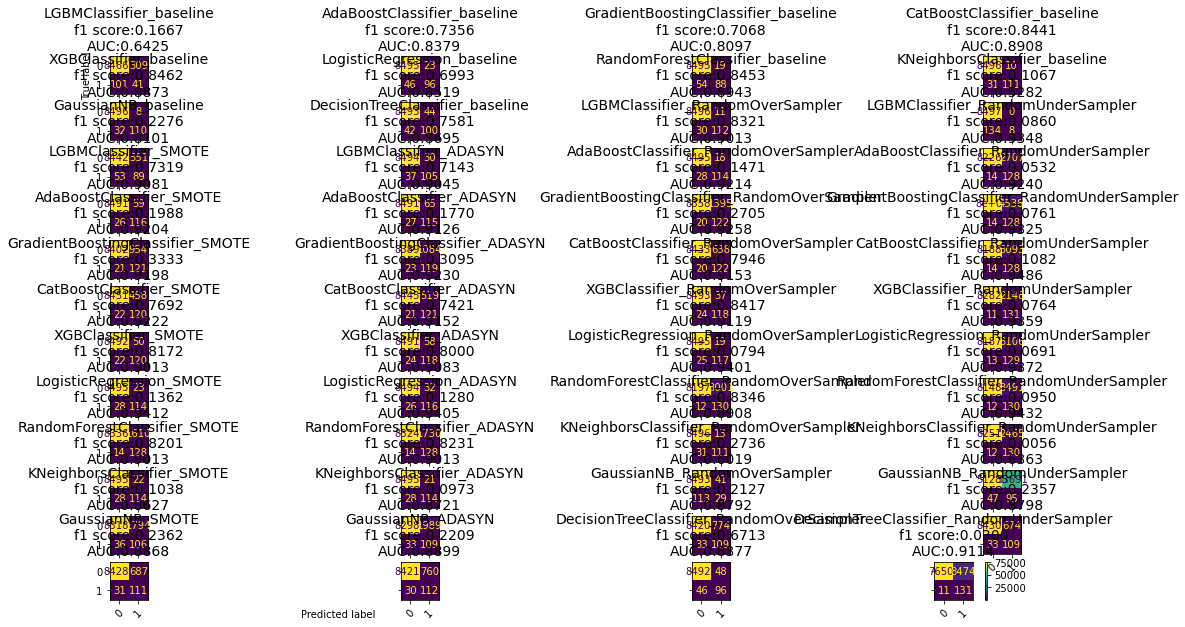

In [36]:
ml_models.display_all_confusion_matrices(y_test)

# Deep Learning

## Preprocessing

In [37]:
dl_model_performances= pd.DataFrame(columns=["model_name","precision","recall","f1_score","AUC"])

In [38]:
#data = pd.read_csv('creditcard.csv')
#df = data.copy()

In [39]:
#X = df.drop('Class', axis=1)
#y = df['Class']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
optimizer = 'adam'
loss = 'binary_crossentropy'
metrics=[Precision(), Recall()]

In [42]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=35)

In [43]:
parameters={
    'X_train_scaled' : X_train_scaled,
    'X_test_scaled' : X_test_scaled,
    'y_train' : y_train,
    'y_test' : y_test
}

In [44]:
dl_models= [
            dl_models.ANN_model(**parameters),
            dl_models.CNN_model(**parameters),
            dl_models.RNN_model(**parameters),
            dl_models.LSTM_model(**parameters),
            dl_models.autoencoders(**parameters)
]

Epoch 1/10
1242/1242 [==============================] - 5s 3ms/step - loss: 0.0542 - precision: 0.2510 - recall: 0.2567 - auc: 0.6528 - val_loss: 0.0031 - val_precision: 0.9286 - val_recall: 0.7647 - val_auc: 0.9402
Epoch 2/10
1242/1242 [==============================] - 2s 1ms/step - loss: 0.0032 - precision: 0.8528 - recall: 0.7455 - auc: 0.9421 - val_loss: 0.0029 - val_precision: 0.9167 - val_recall: 0.8088 - val_auc: 0.9403
Epoch 3/10
1242/1242 [==============================] - 2s 2ms/step - loss: 0.0029 - precision: 0.8700 - recall: 0.7756 - auc: 0.9372 - val_loss: 0.0028 - val_precision: 0.9310 - val_recall: 0.7941 - val_auc: 0.9332
Epoch 4/10
1242/1242 [==============================] - 2s 2ms/step - loss: 0.0025 - precision: 0.8530 - recall: 0.7322 - auc: 0.9464 - val_loss: 0.0028 - val_precision: 0.9298 - val_recall: 0.7794 - val_auc: 0.9261
Epoch 5/10
1242/1242 [==============================] - 2s 1ms/step - loss: 0.0026 - precision: 0.9137 - recall: 0.7401 - auc: 0.9681 - 

1242/1242 [==============================] - 3s 2ms/step - loss: 0.0020 - precision: 0.9205 - recall: 0.7770 - auc: 0.9688 - val_loss: 0.0023 - val_precision: 0.9821 - val_recall: 0.8088 - val_auc: 0.9550
Epoch 6/10
1242/1242 [==============================] - 2s 2ms/step - loss: 0.0018 - precision: 0.9403 - recall: 0.8152 - auc: 0.9595 - val_loss: 0.0025 - val_precision: 0.9649 - val_recall: 0.8088 - val_auc: 0.9552
Epoch 7/10
1242/1242 [==============================] - 2s 2ms/step - loss: 0.0015 - precision: 0.9611 - recall: 0.8323 - auc: 0.9809 - val_loss: 0.0024 - val_precision: 0.9492 - val_recall: 0.8235 - val_auc: 0.9553
Epoch 8/10
1242/1242 [==============================] - 2s 2ms/step - loss: 0.0017 - precision: 0.9392 - recall: 0.8255 - auc: 0.9664 - val_loss: 0.0024 - val_precision: 0.9474 - val_recall: 0.7941 - val_auc: 0.9480
Epoch 9/10
1242/1242 [==============================] - 2s 2ms/step - loss: 0.0013 - precision: 0.9432 - recall: 0.8599 - auc: 0.9732 - val_loss: 0

In [45]:
dl_models

[('ANN',
  0.9137930870056152,
  0.7464788556098938,
  0.8217054090278666,
  0.9395813941955566),
 ('CNN',
  0.9122806787490845,
  0.7323943376541138,
  0.8124999733117875,
  0.929394006729126),
 ('RNN',
  0.9454545378684998,
  0.7323943376541138,
  0.8253968043797679,
  0.9326072335243225),
 ('LSTM',
  0.9039999842643738,
  0.7957746386528015,
  0.8464419354437832,
  0.9430391192436218),
 ('Autoencoder',
  0.10810810810810811,
  0.5915492957746479,
  0.18280739934711646,
  0.9503917924795999)]

In [46]:
for i in range(len(dl_models)):
    dl_model_performances.loc[len(dl_model_performances.index)] = dl_models[i]

In [47]:
dl_model_performances.sort_values(by=['f1_score','AUC'], 
                                  ascending=False).reset_index(drop=True)

,model_name,precision,recall,f1_score,AUC
0,LSTM,0.904000,0.795775,0.846442,0.943039
1,RNN,0.945455,0.732394,0.825397,0.932607
2,ANN,0.913793,0.746479,0.821705,0.939581
3,CNN,0.912281,0.732394,0.812500,0.929394
4,Autoencoder,0.108108,0.591549,0.182807,0.950392


In [48]:
final_result = pd.concat([ml_model_performances, dl_model_performances])

In [49]:
final_result.sort_values(by=['f1_score','AUC'], 
                                  ascending=False).reset_index(drop=True)

,model_name,precision,recall,f1_score,AUC
0,LSTM,0.904000,0.795775,0.846442,0.943039
1,XGBClassifier_baseline,0.932203,0.774648,0.846154,0.887277
2,RandomForestClassifier_baseline,0.910569,0.788732,0.845283,0.894301
3,CatBoostClassifier_baseline,0.917355,0.781690,0.844106,0.890786
4,XGBClassifier_RandomOverSampler,0.860294,0.823944,0.841727,0.911860
5,RandomForestClassifier_RandomOverSampler,0.895161,0.781690,0.834586,0.890769
6,LGBMClassifier_RandomOverSampler,0.863636,0.802817,0.832117,0.901303
7,RNN,0.945455,0.732394,0.825397,0.932607
8,RandomForestClassifier_ADASYN,0.844444,0.802817,0.823105,0.901285
9,ANN,0.913793,0.746479,0.821705,0.939581


In [50]:
ml_models.all_performances.sort_values(by=['f1_score','AUC'], 
                                  ascending=False).reset_index(drop=True)[:5]

,model_name,precision,recall,f1_score,AUC
0,XGBClassifier_baseline,0.932203,0.774648,0.846154,0.887277
1,RandomForestClassifier_baseline,0.910569,0.788732,0.845283,0.894301
2,CatBoostClassifier_baseline,0.917355,0.781690,0.844106,0.890786
3,XGBClassifier_RandomOverSampler,0.860294,0.823944,0.841727,0.911860
4,RandomForestClassifier_RandomOverSampler,0.895161,0.781690,0.834586,0.890769


In [51]:
dl_model_performances

,model_name,precision,recall,f1_score,AUC
0,ANN,0.913793,0.746479,0.821705,0.939581
1,CNN,0.912281,0.732394,0.812500,0.929394
2,RNN,0.945455,0.732394,0.825397,0.932607
3,LSTM,0.904000,0.795775,0.846442,0.943039
4,Autoencoder,0.108108,0.591549,0.182807,0.950392


# Hyperparameter Tuning

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [53]:
kf = StratifiedKFold(n_splits=5, shuffle=False)

In [54]:
params = {
    'n_estimators': [100,200,300],
    'max_depth': [3,4,5],
    'random_state': [0,1]
}

#for i in ml_models_list:
#    grid_rf = GridSearchCV(i, param_grid=params,
#                       cv=kf, scoring='f1').fit(X_train, y_train)
#    print(i, 'baseline Best parameters:', grid_rf.best_params_)
#    print(i, 'baseline Best score:', grid_rf.best_score_)

In [55]:
#grid_rf.best_params_

In [56]:
#ml_models_list = [
    
                  #lgb.LGBMClassifier(max_depth=2, n_estimators=5, random_state=0), 
                  #AdaBoostClassifier(),
                  #GradientBoostingClassifier(),
                  #CatBoostClassifier(max_depth=4, n_estimators=7, random_state=0),
                  #XGBClassifier()
#]    

In [57]:
#for i in ml_models_list:
#    ml_models.model_performance(i, X_train, X_test, y_train, y_test, "baseline_ht")

In [58]:
#lgb.LGBMClassifier(max_depth=2, n_estimators=5, random_state=0), 
#CatBoostClassifier(max_depth=4, n_estimators=7, random_state=0),

In [59]:
ml_models_list[4]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
params = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

In [ ]:
grid_model = GridSearchCV(ml_models_list[4], param_grid=params,
                       cv=kf, scoring='f1').fit(X_train, y_train)

print(i, 'baseline Best parameters:', grid_model.best_params_)
print(i, 'baseline Best score:', grid_model.best_score_)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:32:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:32:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:32:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:32:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:32:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:33:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:33:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:33:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:33:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:33:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:33:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:33:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:33:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:34:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:34:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:34:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:34:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:34:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:34:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:35:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:35:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:35:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:35:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:35:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:35:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:35:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:35:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:35:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:36:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:36:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:36:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:36:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:36:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:36:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:37:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:37:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:37:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:37:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:38:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:38:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:38:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
